In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Inspect data
print(data.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

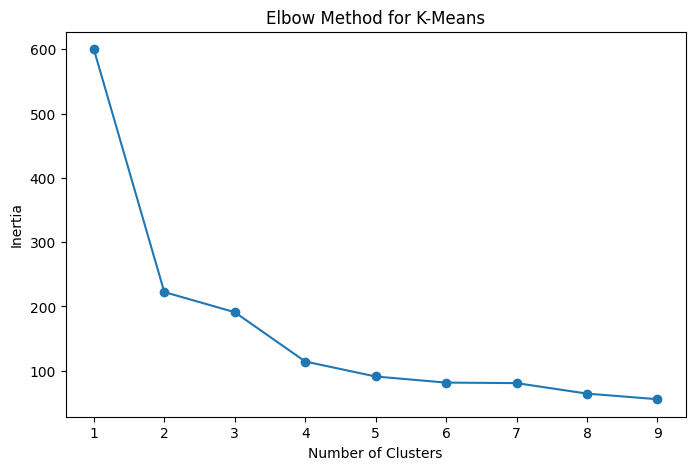

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine optimal number of clusters
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means')
plt.show()

# Apply K-Means with optimal clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)


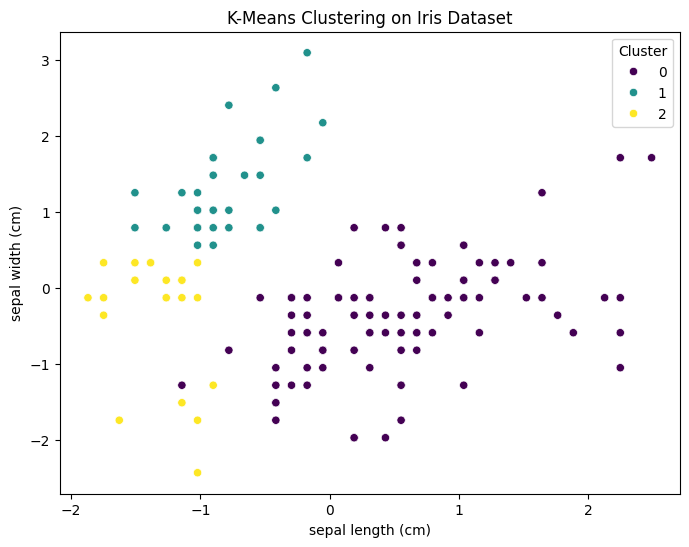

In [4]:
import seaborn as sns

# Scatter plot for two features
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data_scaled[:, 0],
    y=data_scaled[:, 1],
    hue=data['Cluster'],
    palette='viridis'
)
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()


In [5]:
from sklearn.metrics import silhouette_score

# Silhouette Score
score = silhouette_score(data_scaled, data['Cluster'])
print(f'Silhouette Score: {score:.2f}')


Silhouette Score: 0.48


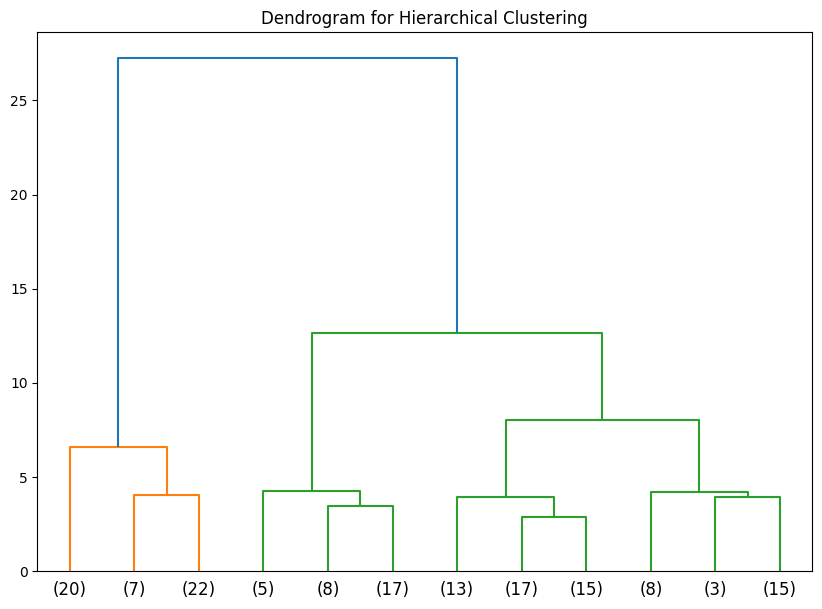

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linked = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=12)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()
